### IMPORT LIBRARIES

In [9]:
import requests 

In [10]:
from plotly.graph_objs import Bar
from plotly import offline

### PROCESSING API RESPONSE

In [11]:
url = 'https://api.github.com/search/repositories?q=language:Python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers = headers)
print(f"Status code: {r.status_code}")

Status code: 200


### PROCESSING RESULTS

In [12]:
response_dict = r.json()
repo_dicts = response_dict['items']

In [14]:
repo_names, stars, labels = [], [], []
for repo_dict in repo_dicts:
    repo_names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])

    owner = repo_dict['owner']['login']
    description = repo_dict['description']
    label = f"{owner}<br />{description}"
    labels.append(label)

### MAKE VISUALIZATION 

In [15]:
data = [{
    'type': 'bar',
    'x': repo_names,
    'y': stars,
    'hovertext': labels,
    'marker': {
        'color': 'rgb(60, 100, 150)',
        'line': {'width': 1.5, 'color': 'rgb(25, 25, 25)'}
    },
    'opacity': 0.6,
}]

In [16]:
my_layout = {
    'title': 'Most-Starred Python Projects on Github',
    'titlefont': {'size': 28},
    'xaxis': {
        'title': 'Repository',
        'titlefont': {'size': 24},
        'tickfont': {'size': 14},
    },
     'yaxis': { 
        'title': 'Stars',
        'titlefont': {'size': 24},
        'tickfont': {'size': 14}, 
      },
            
    }

    



In [17]:
fig = {'data': data, 'layout': my_layout}

offline.plot(fig, filename='python_repos.html')

'python_repos.html'

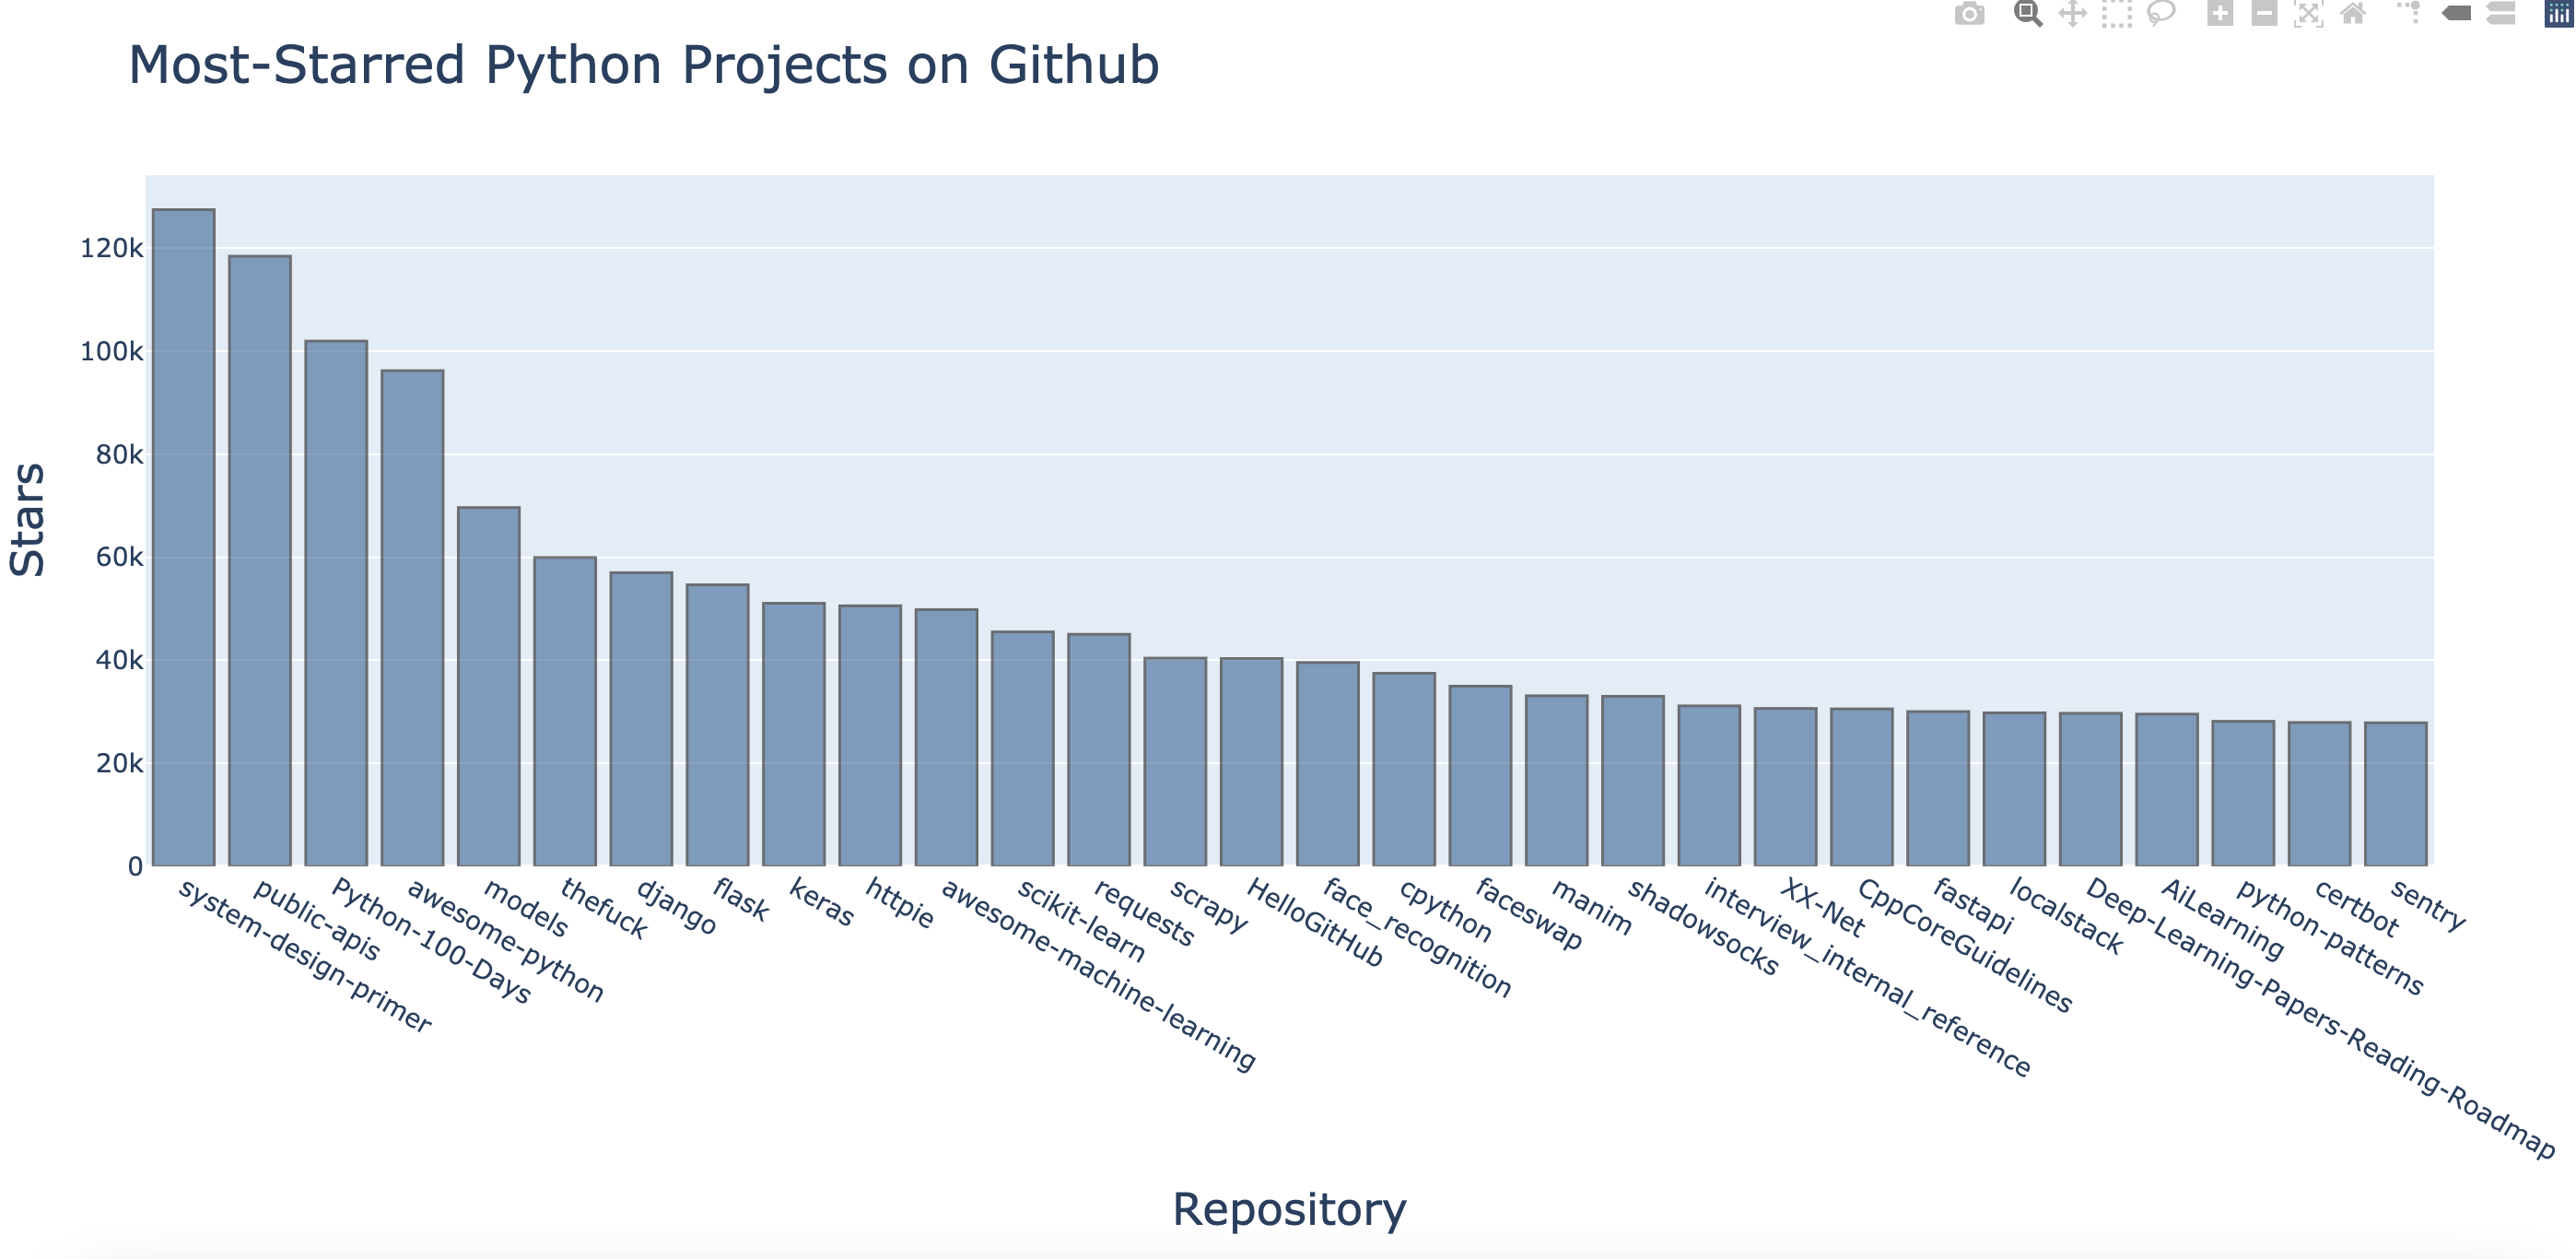